In [1]:
from pH_analysis import folderToArray, arrayToDF, polyGraph, solveForY, loadObjs

In [8]:
folder = "C:\\Users\\Peter\\Documents\\!Experiments\\test_phLIF_Tiff\\processed"

In [9]:
golgis = loadObjs(folder)

In [10]:
for item in golgis:
    print(item.name)

B4GALT1_unt_001_cell_1
B4GALT1_unt_001_cell_10
B4GALT1_unt_001_cell_2
B4GALT1_unt_001_cell_3
B4GALT1_unt_001_cell_4
B4GALT1_unt_001_cell_5
B4GALT1_unt_001_cell_6
B4GALT1_unt_001_cell_7
B4GALT1_unt_001_cell_8
B4GALT1_unt_001_cell_9
B4GALT1_unt_002_cell_1
B4GALT1_unt_002_cell_10
B4GALT1_unt_002_cell_11
B4GALT1_unt_002_cell_12
B4GALT1_unt_002_cell_13
B4GALT1_unt_002_cell_14
B4GALT1_unt_002_cell_15
B4GALT1_unt_002_cell_2
B4GALT1_unt_002_cell_3
B4GALT1_unt_002_cell_4
B4GALT1_unt_002_cell_5
B4GALT1_unt_002_cell_6
B4GALT1_unt_002_cell_7
B4GALT1_unt_002_cell_8
B4GALT1_unt_002_cell_9
B4GALT1_unt_003_cell_1
B4GALT1_unt_003_cell_10
B4GALT1_unt_003_cell_11
B4GALT1_unt_003_cell_12
B4GALT1_unt_003_cell_13
B4GALT1_unt_003_cell_14
B4GALT1_unt_003_cell_15
B4GALT1_unt_003_cell_16
B4GALT1_unt_003_cell_2
B4GALT1_unt_003_cell_3
B4GALT1_unt_003_cell_4
B4GALT1_unt_003_cell_5
B4GALT1_unt_003_cell_6
B4GALT1_unt_003_cell_7
B4GALT1_unt_003_cell_8
B4GALT1_unt_003_cell_9
B4GALT1_unt_004_cell_1
B4GALT1_unt_004_cell

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def removeOutliers(x):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * 1.5
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return(resultList)

In [17]:
def arrayToDF(arr):
    # First calculate ratio for all items
    for item in arr:
        item.calcRatio(0, 1)

    group_set = set()
    for item in arr:
        group_set.add(item.group)

    d = {}
    for group in group_set:
        temp = []
        for item in arr:
            if group == item.group:
                temp.append(item.ratio)
                temp = removeOutliers(temp)
                d[group] = temp
    df = pd.DataFrame.from_dict(d, orient='index')
    df = df.T
    df.to_csv('raw_data.csv')
    ph_cols = [col for col in df.columns if 'pH' in col]
    ph_df = df[ph_cols]

    for i, col in enumerate(ph_cols):
        temp = col.split('pH')[1]
        ph_cols[i] = float(temp)

    ph_df.columns = ph_cols
    pH_m = ph_df.melt(var_name="pH", value_name="Ratio")

    rest_cols = [col for col in df.columns if 'pH' not in col]
    rest_df = df[rest_cols]

    pH_m = pH_m.dropna()
    pH_m = pH_m.sort_values(by=['pH']).reset_index(drop=True)

    return(pH_m, rest_df)

In [19]:
ph_df, rest_df = arrayToDF(golgis)

TypeError: argument of type 'NoneType' is not iterable

In [33]:
df = pd.read_csv("raw_data.csv")

In [34]:
ph_cols = [col for col in df.columns if 'pH' in col]

In [35]:
ph_df = df[ph_cols]
for i, col in enumerate(ph_cols):
    temp = col.split('pH')[1]
    ph_cols[i] = float(temp)
ph_df.columns = ph_cols
ph_m = ph_df.melt(var_name="pH", value_name="Ratio")
ph_m = ph_m.dropna()
ph_m = ph_m.sort_values(by=['pH']).reset_index(drop=True)

In [41]:
from numpy.polynomial import Polynomial as P

def polyGraph(inFile, pH_df, deg):
    x = pH_df['pH'].values
    y = pH_df['Ratio'].values
    print(x)

    p = P.fit(x, y, deg)

    x_new = np.linspace(x[0], x[-1], 50)
    y_new = p(x_new)

    # plt.plot(x, y, 'o', x_new, y_new)
    plt.scatter(x, y)
    plt.xlabel("pH")
    plt.ylabel("Ratio 405/470")
    plt.title(f"{inFile}")  
    # plt.savefig(f"{inFile}.pdf", dpi=300, papertype="a4")
    #plt.close()
    return(p)

[3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5
 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5
 3.5 3.5 3.5 3.5 3.5 3.5 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.5 4.5 4.5
 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5
 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 5.  5.
 5.  5.  5.  5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5
 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 6.
 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.5 6.5 6.5 6.5 6.5
 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
 7.  7.  7.  7.  7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5
 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5 7.5
 7.5 7.5 7.5 7.5 7.5]


Polynomial([ 1.03476455,  0.6862335 ,  0.72008579, -0.60318933, -0.35681067,
        0.45255213], domain=[3.5, 7.5], window=[-1.,  1.])

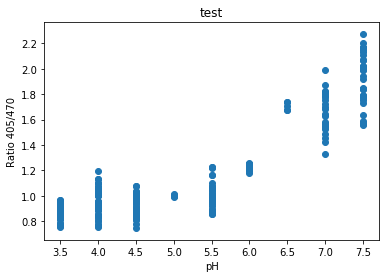

In [42]:
polyGraph('test', ph_m, 5)

In [30]:
ph_m

,pH,Ratio
0,pH3.5,0.772065
1,pH3.5,0.866930
2,pH3.5,0.880424
3,pH3.5,0.906480
4,pH3.5,0.901860
5,pH3.5,0.922473
6,pH3.5,0.903839
7,pH3.5,0.902911
8,pH3.5,0.886732
9,pH3.5,0.867850
